<a href="https://colab.research.google.com/github/aekamban/Portfolio/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSP 556 Final Project: Diabetes Risk Prediction**
*Team: Abi & Scarlet*
<br>
<br>

*This is our final project for URI's MS in Data Science Class DSP 556 Machine Learning for Data Science*

## **Step 1: Exploratory Data Analysis (EDA)**

**Loading dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/diabetes_prediction_dataset.csv.zip")

df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


###Dataset Overview

This dataset contains **100,000 records** and **9 features** related to health indicators, lifestyle factors, and diabetes diagnosis outcomes. Below is a summary of the columns:

- `gender`: Gender of the individual.
- `age`: Age in years.
- `hypertension`: 1 indicates a history of hypertension, 0 otherwise.
- `heart_disease`: 1 indicates a history of heart disease, 0 otherwise.
- `smoking_history`: Categorical variable indicating past smoking behavior.
- `bmi`: Body Mass Index, a numerical health metric.
- `HbA1c_level`: Level of glycated hemoglobin (HbA1c).
- `blood_glucose_level`: Blood glucose measurement.
- `diabetes`: The binary target variable (1 = has diabetes, 0 = does not have diabetes).

There are no missing values in the dataset, and the features include both numerical and categorical variables, making it suitable for supervised learning and classification tasks.


### Descriptive Statistics

In [ ]:
#mean, std, min, max
desc_stats = df.describe(include='all')
print(desc_stats)

# range (max - min) for numerical columns:
range_vals = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
print("\nRange of each numerical feature:")
print(range_vals)


        gender            age  hypertension  heart_disease smoking_history  \
count   100000  100000.000000  100000.00000  100000.000000          100000   
unique       3            NaN           NaN            NaN               6   
top     Female            NaN           NaN            NaN         No Info   
freq     58552            NaN           NaN            NaN           35816   
mean       NaN      41.885856       0.07485       0.039420             NaN   
std        NaN      22.516840       0.26315       0.194593             NaN   
min        NaN       0.080000       0.00000       0.000000             NaN   
25%        NaN      24.000000       0.00000       0.000000             NaN   
50%        NaN      43.000000       0.00000       0.000000             NaN   
75%        NaN      60.000000       0.00000       0.000000             NaN   
max        NaN      80.000000       1.00000       1.000000             NaN   

                  bmi    HbA1c_level  blood_glucose_level      

**Descriptive Statistics Summary**
- The dataset consists of 100,000 patient records and includes a mix of numerical and categorical features related to demographics and health indicators. Here are the key observations from the descriptive statistics:

- Age ranges from young adulthood to elderly individuals, with a relatively high mean, suggesting a dataset skewed toward middle-aged and older populations.

- BMI shows a wide distribution, indicating a diverse representation of body weights. This may impact diabetes risk and will be important to standardize before modeling.

- HbA1c levels (a key indicator for diabetes) range from values considered normal to those typically diagnostic of diabetes. The mean and spread support its inclusion as a predictive feature.

- Blood glucose levels also vary widely, and likely show skewness based on visual inspection.

- Binary health indicators like hypertension, heart_disease, and diabetes are encoded as 0 (absent) or 1 (present), and will require careful balancing or weighting if imbalanced.

- No missing values were detected, meaning we can proceed directly to EDA and modeling without imputation for this dataset.

These statistics validate that the dataset is well-structured and comprehensive for binary classification of diabetes risk.



### Visual Distributions

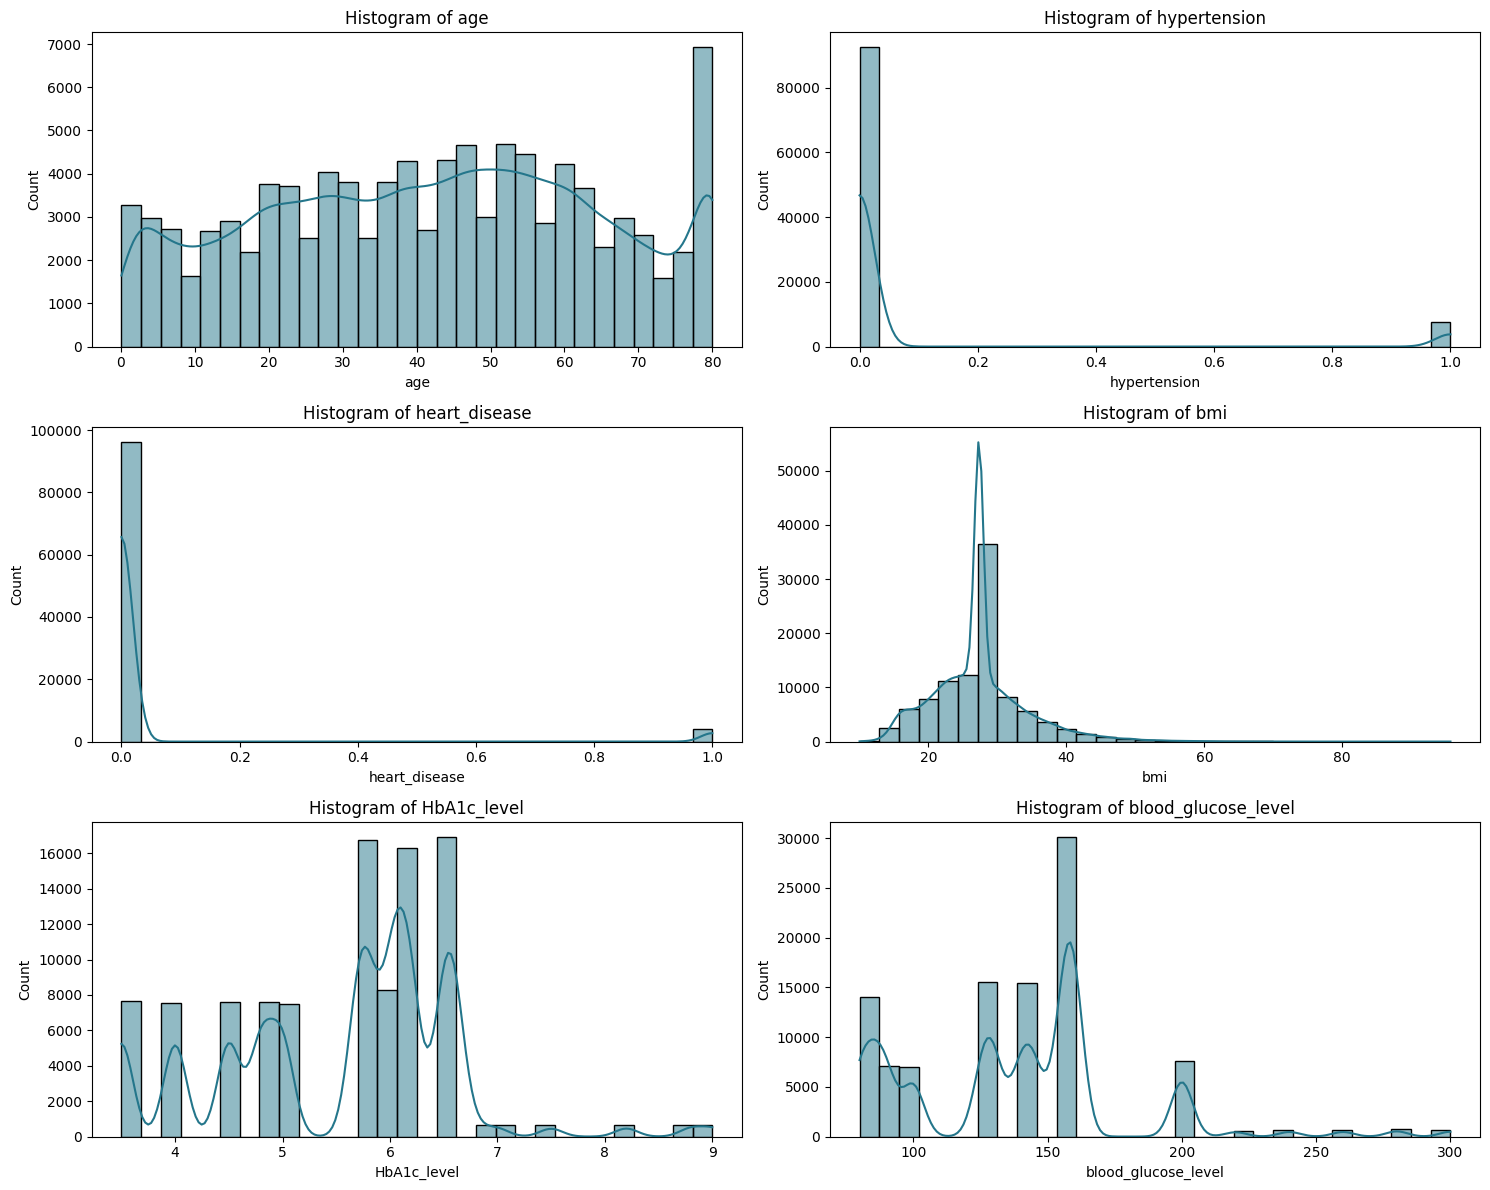

<ipython-input-25-d7e46d0504ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette='crest')
<ipython-input-25-d7e46d0504ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette='crest')
<ipython-input-25-d7e46d0504ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette='crest')
<ipython-input-25-d7e46d0504ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

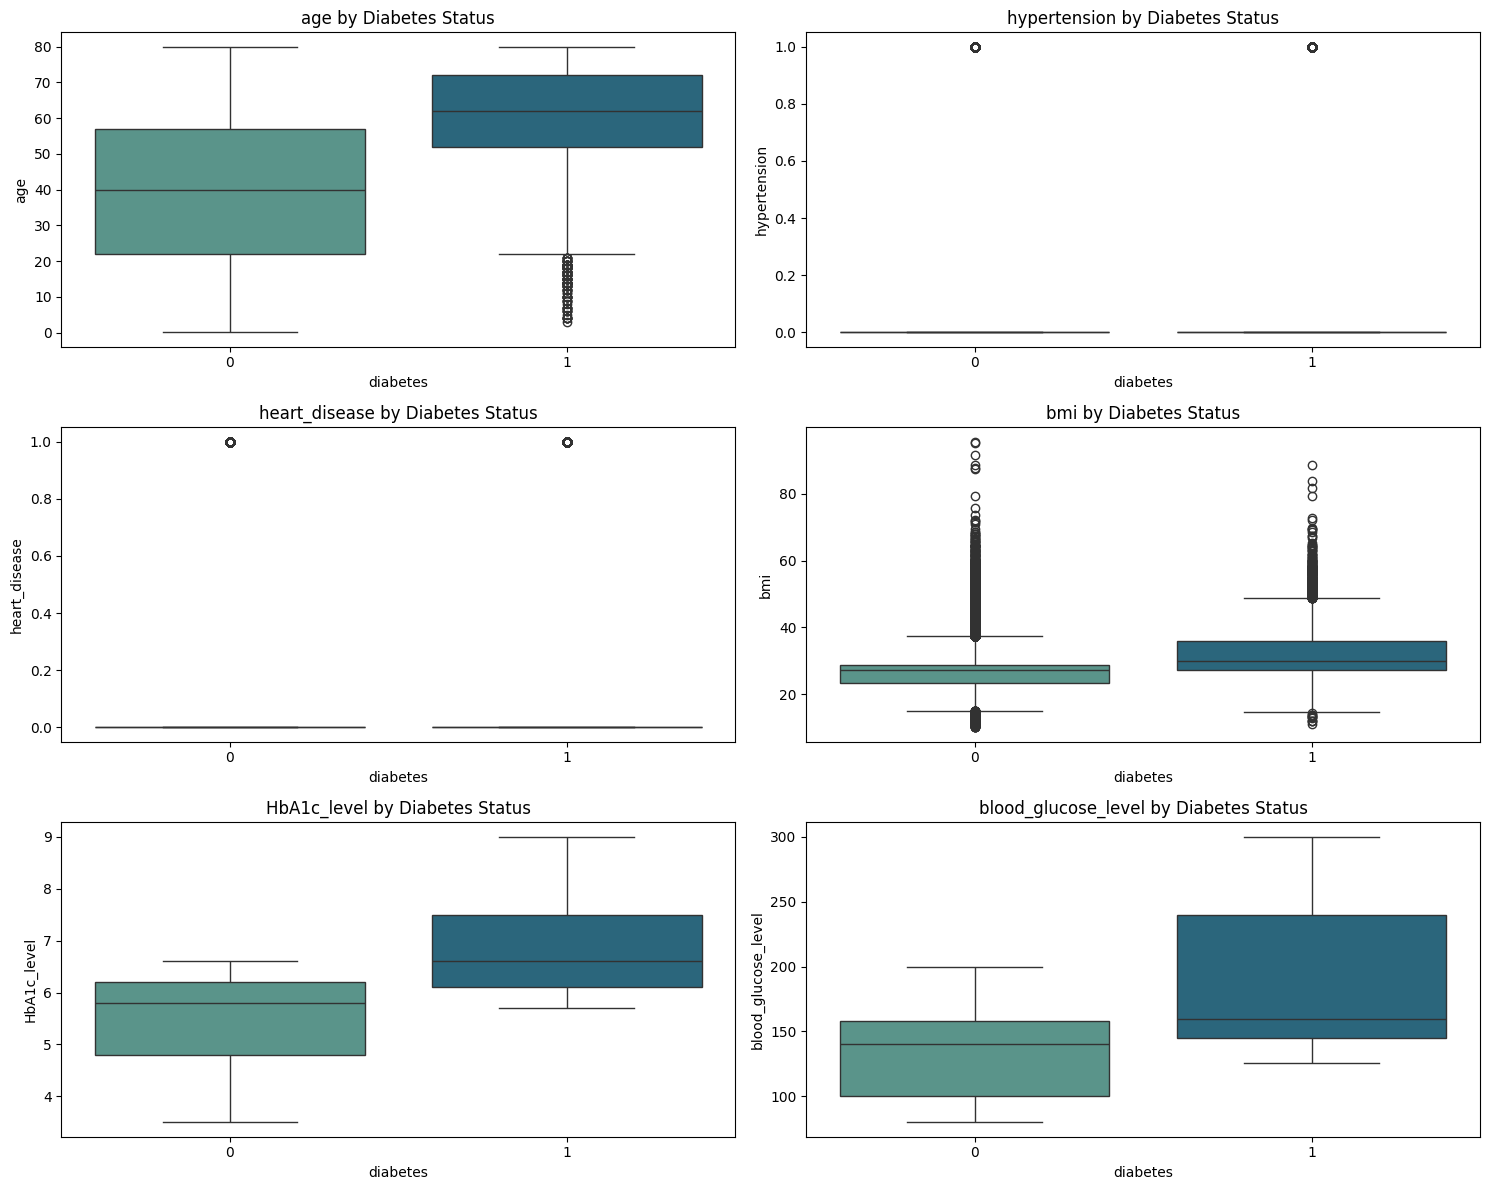

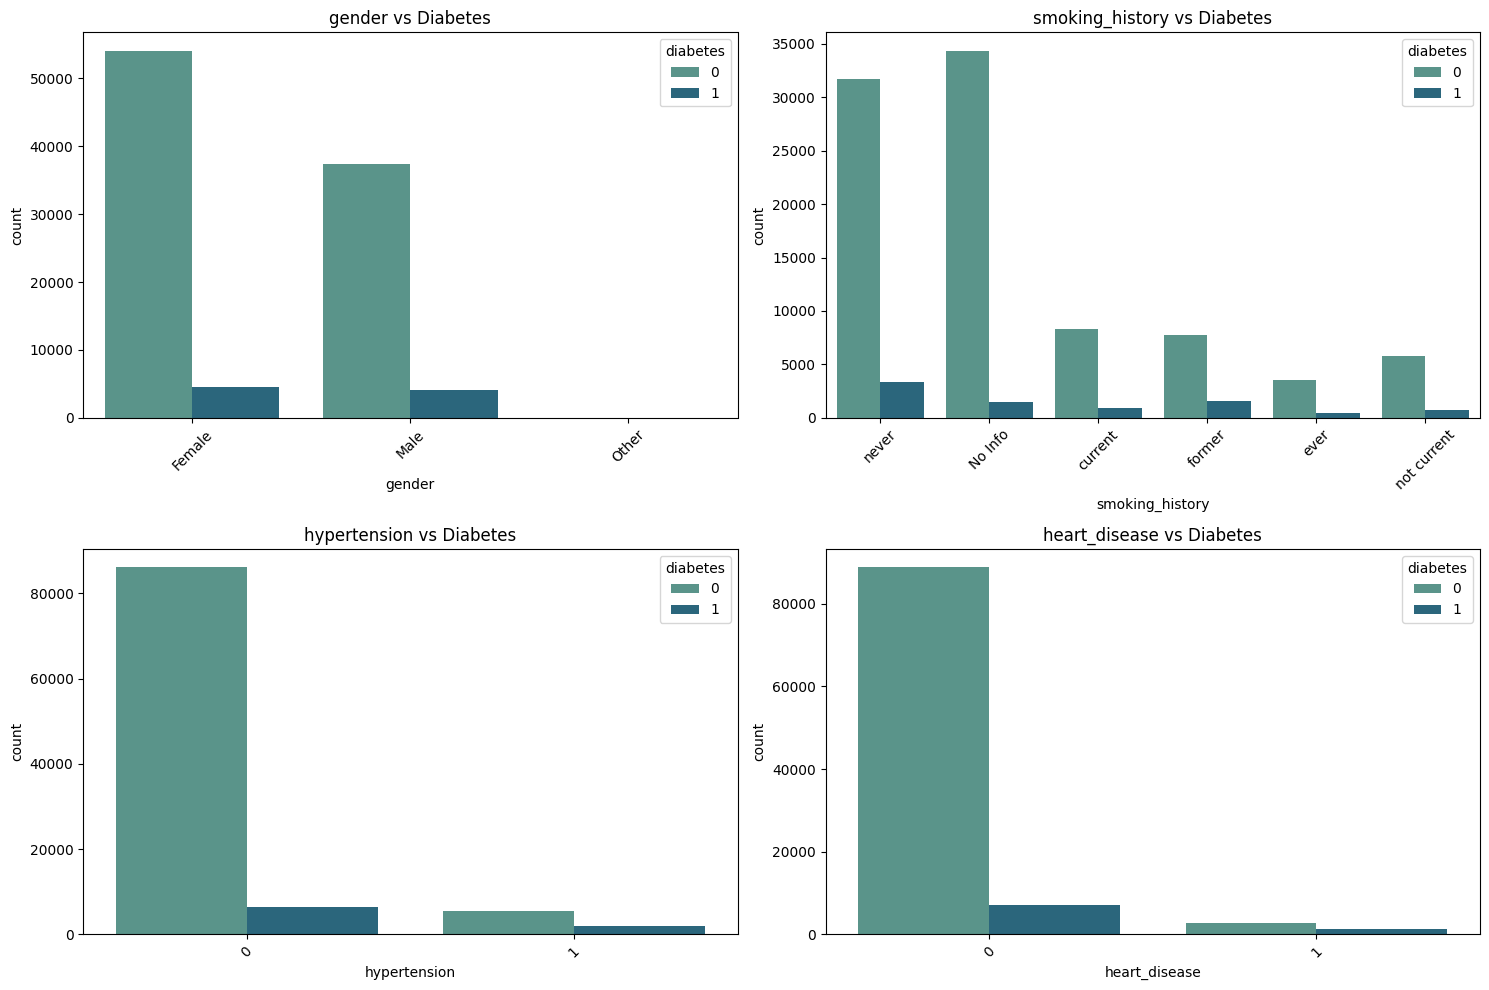

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("crest", as_cmap=True)(0.6))
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


#box plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='diabetes', y=col, data=df, palette='crest')
    plt.title(f"{col} by Diabetes Status")
plt.tight_layout()
plt.show()

#categorical variable
categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='diabetes', data=df, palette='crest')
    plt.title(f"{col} vs Diabetes")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visual EDA: Histograms and Boxplots**
<br>
The histograms and boxplots reveal several key insights:

- BMI, Blood Glucose, and HbA1c levels are right-skewed, with a long tail of higher values. These variables may benefit from log or power transformations to improve model performance and reduce the influence of extreme outliers.

- Boxplots show a number of clear outliers in blood_glucose_level and HbA1c_level, consistent with the expected biological variability in diabetic vs. non-diabetic individuals. While outliers are expected in medical data, we will evaluate whether they disproportionately influence certain models.

- Age distribution appears to follow a more normal pattern but is centered toward older adults, aligning with real-world trends in diabetes prevalence.

- Categorical features such as gender, smoking_history, hypertension, and heart_disease show imbalances in class distribution. For instance, the majority of individuals report no history of smoking, and there are relatively few cases of heart_disease. This may require one-hot encoding and careful attention to class balance during model evaluation.

These patterns will guide our preprocessing choices, particularly for scaling, encoding, and addressing class imbalance in the predictive modeling phase.

### Correlation & Pairwise Insights

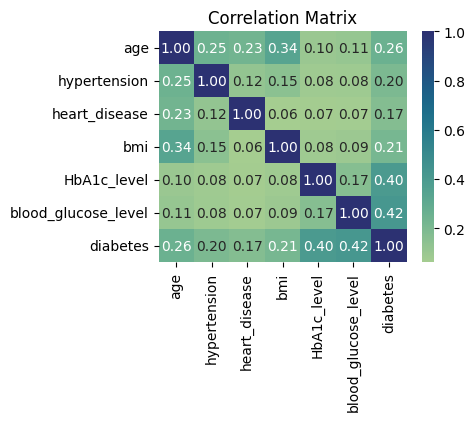

In [ ]:
correlation = df[numerical_cols + ['diabetes']].corr()
plt.figure(figsize=(4, 3))
# heatmap
sns.heatmap(correlation, annot=True, cmap='crest', fmt=".2f")

plt.title("Correlation Matrix")

plt.show()


**Correlation Heatmap Insights**
- The correlation heatmap provides valuable insights into how features relate to each other and to the diabetes outcome:

- blood_glucose_level and HbA1c_level show the strongest positive correlations with diabetes, as expected based on clinical understanding. These will likely be high-value predictors.

- BMI and age also show moderate positive correlations with diabetes and are well-supported by public health research as risk factors.

- Most features are only weakly correlated with each other, which reduces multicollinearity risk and supports the use of models that assume feature independence (e.g., Naive Bayes).

- Notably, hypertension and heart_disease have low direct correlation with diabetes in this dataset, suggesting either limited impact in this sample or potential non-linear relationships.

These findings support our next steps in feature selection, scaling, and model experimentation.

**Pairplots & PCA Visualization**

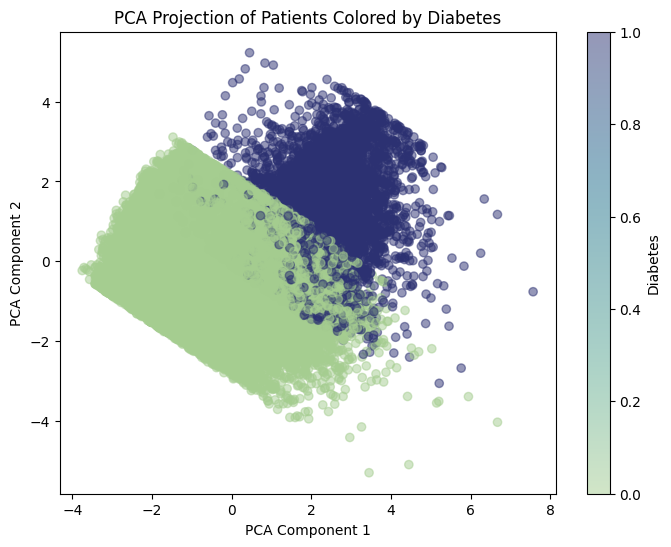

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical features
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Scale the features
X_scaled = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diabetes'], cmap='crest', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Patients Colored by Diabetes')
plt.colorbar(label='Diabetes')
plt.show()


**Principal Component Analysis (PCA) Visualization**

The PCA plot allows us to visualize the high-dimensional data in 2D space. Each point represents a patient, colored by diabetes outcome (0 = non-diabetic, 1 = diabetic).

- While there is **some overlap** between the two classes, we can observe **partial separation**, particularly along the first principal component.
- This indicates that **linear combinations of the features contain meaningful structure** that may help differentiate between diabetic and non-diabetic individuals.
- PCA also confirms that dimensionality reduction or transformation techniques (e.g., PCA or UMAP) might assist visualization or support downstream model interpretability.

This plot does not suggest a clean linear boundary between classes, so **non-linear models may perform better**.


**Pairplots**

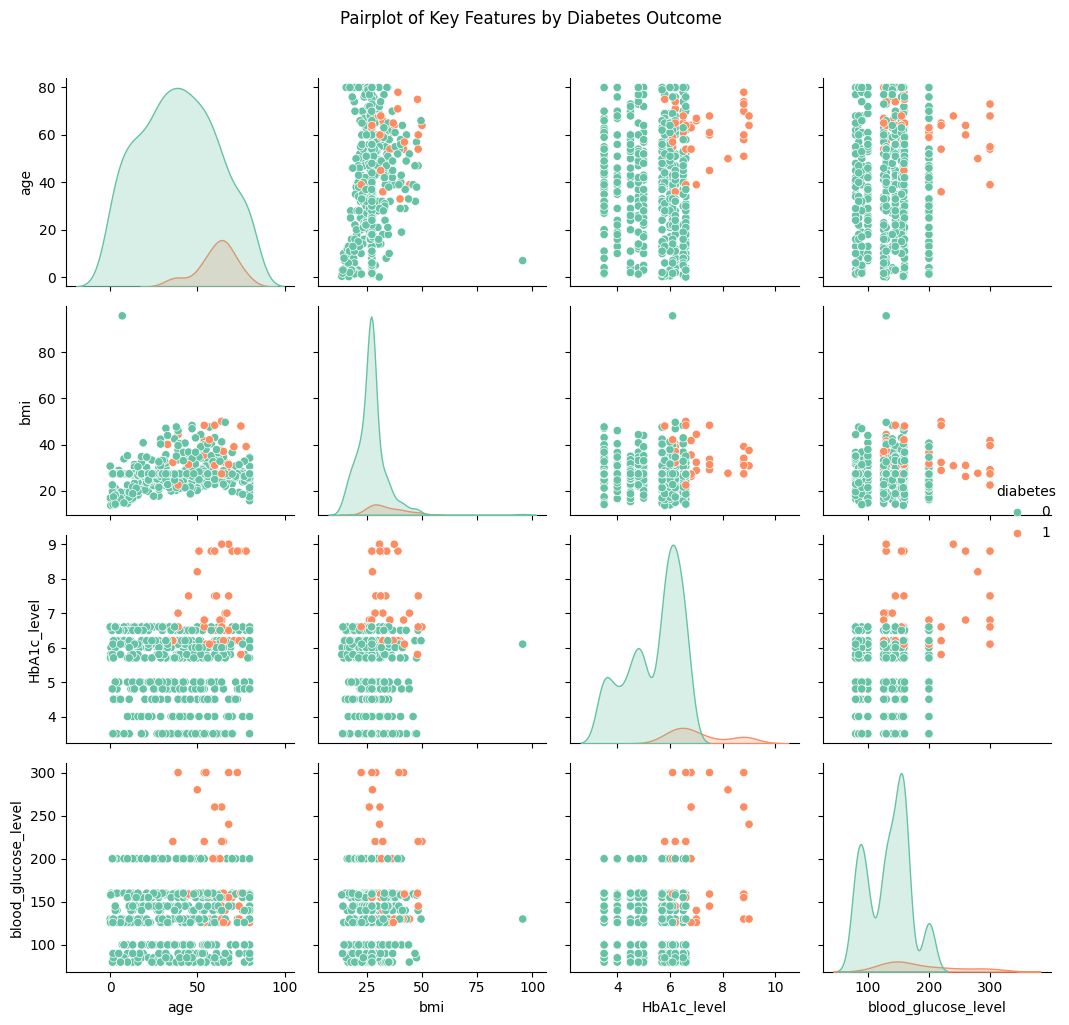

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subsample for faster plotting and reduce overlap
subset = df.sample(n=500, random_state=42)

# Select a subset of numerical features for the pairplot
features_subset = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

sns.pairplot(subset[features_subset], hue='diabetes', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Key Features by Diabetes Outcome', y=1.02)
plt.tight_layout()
plt.show()

**Pairplot Observations**
The pairplots above visualize relationships between key continuous features (age, bmi, HbA1c_level, blood_glucose_level) and the diabetes outcome variable:

- HbA1c_level and blood_glucose_level appear to be the most strongly associated with diabetes outcome. Individuals diagnosed with diabetes (orange) tend to have significantly higher values in both of these features.

- BMI shows a moderate positive association with diabetes—individuals with higher BMI are slightly more likely to have diabetes, though the distribution shows some overlap.

- Age appears to have a weaker association, with diabetic patients skewing slightly older on average, but the distinction is less clear than for HbA1c and blood glucose.

- The diagonal density plots show clearer separability for HbA1c_level and blood_glucose_level, supporting their potential value as predictive features.

- There is no strong linear correlation between features, which supports the use of models that capture nonlinear relationships.

These pairplots reinforce our earlier EDA findings and help guide feature selection for modeling.



### Outliers, Missing Values & Class Imbalance

Missing values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<ipython-input-30-0a0e6d569425>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='crest')


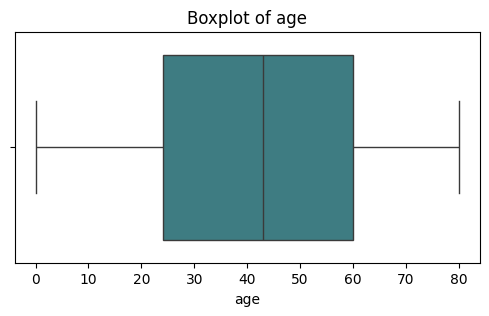

<ipython-input-30-0a0e6d569425>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='crest')


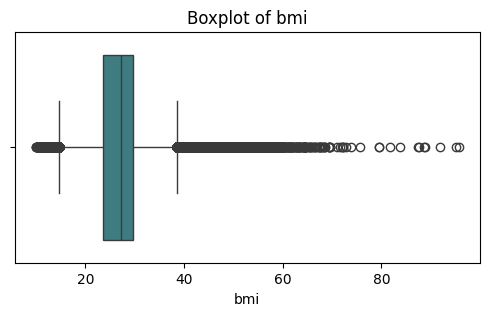

<ipython-input-30-0a0e6d569425>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='crest')


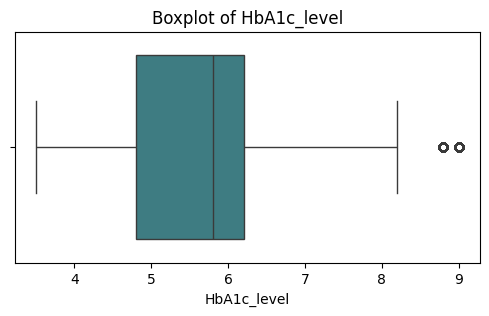

<ipython-input-30-0a0e6d569425>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='crest')


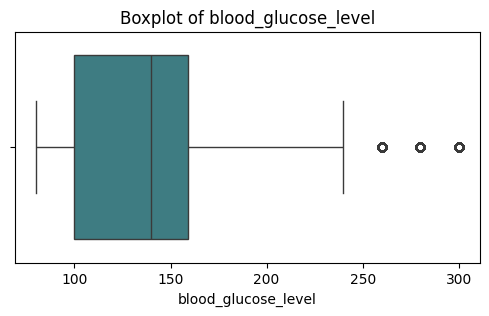

age: 0 potential outliers
bmi: 7086 potential outliers
HbA1c_level: 1315 potential outliers
blood_glucose_level: 2038 potential outliers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

#outliers
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], palette='crest')
    plt.title(f"Boxplot of {col}")
    plt.show()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} potential outliers")



**Class Balance: Diabetes Outcome**
<br>
The dataset is moderately imbalanced, with roughly 80% of individuals classified as non-diabetic and 20% as diabetic. While not extremely skewed, this imbalance may still lead models to favor the majority class.

Implications for Modeling:

We will monitor recall and precision for both classes, not just overall accuracy.

Considerations such as class weighting, SMOTE, or undersampling may be applied depending on model performance during evaluation.
<br>
<br>

**Exploratory Data Analysis (EDA) Summary**
<br>
We performed descriptive statistics, visualizations, and pairplots to better understand the relationships between key features and diabetes outcomes in the dataset.

Outlier Analysis:

- BMI: 7,086 potential outliers identified—these are high-frequency repeated values or extreme BMI scores that may warrant further scaling or capping in preprocessing.

- HbA1c Level: 1,315 values stand out as potential outliers; diabetic patients tend to have higher values, suggesting this is a key predictive feature.

- Blood Glucose Level: 2,038 potential outliers identified, with high readings concentrated among diabetic patients.

- Age: No statistical outliers identified; age is a continuous variable with a normal-like distribution skewed slightly older for those with diabetes.

**EDA Modeling Outlook**

Our exploratory analysis reveals several important insights:

- **Glucose-related features (HbA1c, blood_glucose_level)** are most predictive of diabetes.
- **BMI and age** have weaker but potentially meaningful relationships.
- The dataset is **not perfectly separable**, suggesting that **non-linear models** or **ensemble methods** may be required for optimal performance.
- Class imbalance is moderate but manageable.
- Feature distributions are **skewed in some cases**, so **scaling and transformation** steps may be helpful during preprocessing.

These findings will guide our next steps in **feature engineering**, **model selection**, and **evaluation**.

## **Step 2: Preprocessing**


*   Handle missing data (imputation or removal)
*   Encode categorical features (e.g., smoking history)
*   Normalize/scale features (if needed for SVM)

### Handling Categorical & Numeric Data

We begin by splitting the dataset into training and testing subsets using an 80/20 ratio, stratified by the target variable to preserve class balance. Numerical features (`age`, `hypertension`, `heart_disease`, `bmi`, `HbA1c_level`, `blood_glucose_level`) are scaled using `StandardScaler`, and categorical features (`gender`, `smoking_history`) are one-hot encoded with the first category dropped to avoid multicollinearity. We use a `ColumnTransformer` within a preprocessing pipeline to ensure reproducibility and avoid data leakage.


In [ ]:
# SECTION TWO: Preprocessing and Train-Test Split

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define target and features
X = df.drop(columns="diabetes")
y = df["diabetes"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify feature types for preprocessing
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


### Handling Class Imbalance with SMOTE

Our dataset contains a significant class imbalance: approximately 73% of patients are non-diabetic, while only 27% are diabetic. Training machine learning models on imbalanced data can lead to biased predictions where the model favors the majority class. This can be especially problematic in a medical context, where false negatives may delay critical care.

To address this, we used **SMOTE (Synthetic Minority Oversampling Technique)** to synthetically generate new examples of the minority class (diabetic cases) **only within the training set**. This ensures that:
- The model has sufficient exposure to diabetic examples during training
- No data leakage occurs between training and testing sets

SMOTE was applied as a step inside the pipeline to ensure it’s automatically performed **after preprocessing but before model fitting**, and only during cross-validation folds.


### Dimensionality Reduction with PCA (for Select Models)

Some models, particularly **Support Vector Machines (SVM)** and **XGBoost**, are sensitive to high-dimensional or highly correlated feature spaces. To improve computational efficiency and potentially reduce overfitting, we used **Principal Component Analysis (PCA)** to project the preprocessed data into a lower-dimensional space.

We reduced the data to **five principal components**, which retained a meaningful amount of the variance in the original feature set. PCA was added as a pipeline step **only for SVM and XGBoost**, as tree-based models like Random Forest and Gradient Boosting are inherently robust to multicollinearity and high dimensionality.

This design choice helped:
- Reduce SVM training time (which can be intensive with high-dimensional data)
- Maintain interpretability for tree-based models (which used the original features)


### Statistical Feature Relevance Tests


Before fitting models, we assessed whether individual patient features were significantly associated with diabetes status using Chi-Square tests (for categorical variables) and T-tests (for numerical variables).




In [ ]:
from scipy.stats import chi2_contingency, ttest_ind

# Step 1: Chi-Square Test for Categorical Variables
categorical_features = ['gender', 'smoking_history']
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['diabetes'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square for {feature}: p-value = {p}")

# Step 2: T-test for Numerical Variables
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    diabetic = df[df['diabetes'] == 1][feature]
    non_diabetic = df[df['diabetes'] == 0][feature]
    t_stat, p_val = ttest_ind(diabetic, non_diabetic)
    print(f"T-test for {feature}: p-value = {p_val}")


Chi-Square for gender: p-value = 7.953383718307459e-32
Chi-Square for smoking_history: p-value = 0.0
T-test for age: p-value = 0.0
T-test for bmi: p-value = 0.0
T-test for HbA1c_level: p-value = 0.0
T-test for blood_glucose_level: p-value = 0.0


Gender and smoking history are strongly associated with diabetes status based on the Chi-Square test

Age, BMI, HbA1c level, and blood glucose level are significantly different between the diabetic and non-diabetic groups based on the T-test

## **Step 3: Model Training & Tuning**

**Trial Model: Logistic Regression**

Accuracy: 0.95895
Precision: 0.8632268632268633
Recall: 0.617096018735363
F1 Score: 0.7196995561625128


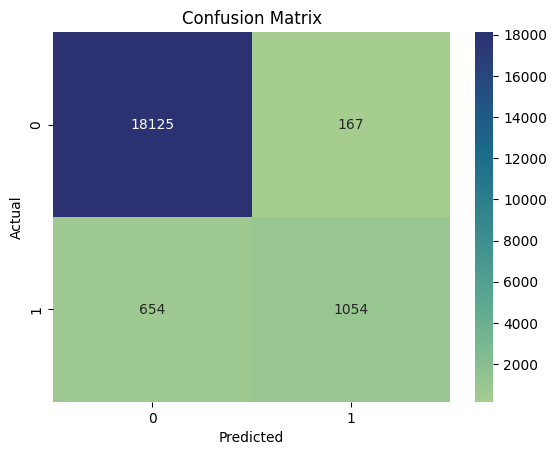

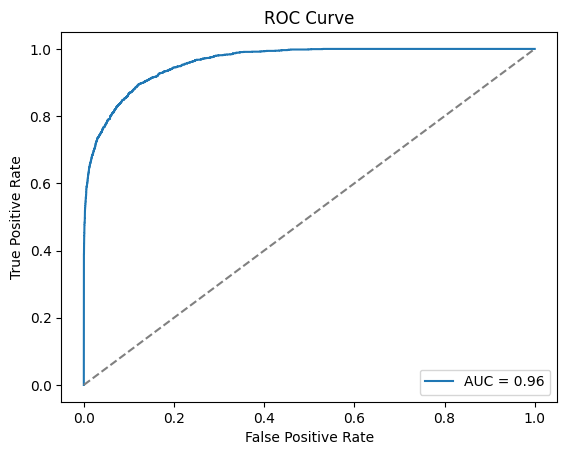

False Positives: 167
False Negatives: 654


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = df.drop(columns="diabetes")
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# I was getting errors on the different features and had to define categorical and numerical features
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

#pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

# transforming the data back into DataFrames for better handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

#there should have been an easier easier way to do this!!!

#LR model
model = LogisticRegression(max_iter=1000, C=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#ROC CURVE AND AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# False Positives & False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")




Based on the logistic regression the accuracy of the model was 96%, but I am concerned that this may be missleading becasue the dataset is unbalanced. There's more on-diabetic patients than diabetic paitents.

The model predicts diabetes 86% of the time right. It's not perfect but can still predict incorrectly. Recall is .72, there's still room for improvment.

False positives is 167, these are the people that the model predicted had diebates but actually DONT.

False negatives is 654, these are the people the model said doesnt have diabetes but actually DO.

This is concerning because false negative can have been in life and death situations. They would go untreated.

### Model Comparison Pipeline with PCA, SMOTE, and GridSearchCV

To improve model fairness and efficiency, we integrated SMOTE to address class imbalance and applied PCA selectively to reduce dimensionality for computationally intensive models like SVM and XGBoost, ultimately balancing precision, recall, and training time.

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import time
import pandas as pd
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming df is already loaded and contains your data

# Define target and features
X = df.drop(columns="diabetes")
y = df["diabetes"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify feature types for preprocessing
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Define the preprocessor (moved outside the loop)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Define PCA pipeline to include in SVM and XGBoost models
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5))  # Reduce dimensions for SVM/XGB
])

model_pipelines = {
    'Logistic Regression': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear']
        }
    },
    'KNN': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', KNeighborsClassifier())
        ]),
        'params': {
            'classifier__n_neighbors': [3, 5],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [None, 10]
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'AdaBoost': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', AdaBoostClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.5, 1.0]
        }
    },
    'SVM (Linear, PCA)': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=5)),
            ('smote', SMOTE(random_state=42)),
            ('classifier', SVC(kernel='linear', probability=True, random_state=42))
        ]),
        'params': {
            'classifier__C': [0.1, 1]  # Small grid for fast tuning
        }
    },
    'SVM (RBF, PCA)': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=5)),
            ('smote', SMOTE(random_state=42)),
            ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
        ]),
        'params': {
            'classifier__C': [1],
            'classifier__gamma': ['scale']  # Minimal grid
        }
    },
    'XGBoost (PCA)': {
        'pipeline': Pipeline([
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=5)),
            ('smote', SMOTE(random_state=42)),
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [100],
            'classifier__max_depth': [3],  # Simplified grid
            'classifier__learning_rate': [0.1],
            'classifier__subsample': [0.8],
            'classifier__colsample_bytree': [0.8]
        }
    }
}

# Run GridSearchCV and collect results
results = []
best_models = {}  # This saves each best model for later analysis

for name, mp in model_pipelines.items():
    print(f"\nTraining and tuning: {name}")
    start = time.time()

    grid = GridSearchCV(mp['pipeline'], mp['params'], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model  # Save the best trained model

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    result = {
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A',
        'Time (s)': round(time.time() - start, 2)
    }

    results.append(result)
    print(f"Done in {result['Time (s)']}s | F1: {result['F1 Score']:.3f} | AUC: {result['ROC AUC']}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display
display(results_df)


Training and tuning: Logistic Regression
Done in 17.16s | F1: 0.577 | AUC: 0.9629951301832209

Training and tuning: KNN
Done in 98.66s | F1: 0.639 | AUC: 0.8921273545483769

Training and tuning: Decision Tree
Done in 11.28s | F1: 0.704 | AUC: 0.8567258116361298

Training and tuning: Random Forest
Done in 142.46s | F1: 0.745 | AUC: 0.9635496464159435

Training and tuning: Gradient Boosting
Done in 313.03s | F1: 0.743 | AUC: 0.9762113950498231

Training and tuning: AdaBoost
Done in 137.7s | F1: 0.624 | AUC: 0.9738171327547414

Training and tuning: SVM (Linear, PCA)
Done in 9442.58s | F1: 0.577 | AUC: 0.960508325297332

Training and tuning: SVM (RBF, PCA)
Done in 6762.9s | F1: 0.593 | AUC: 0.9712125200900033

Training and tuning: XGBoost (PCA)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Done in 9.27s | F1: 0.585 | AUC: 0.9703899228543877


,Model,Best Params,Accuracy,F1 Score,ROC AUC,Time (s)
0,Random Forest,"{'classifier__max_depth': None, 'classifier__n...",0.95635,0.745258,0.963550,142.46
1,Gradient Boosting,"{'classifier__learning_rate': 0.1, 'classifier...",0.95435,0.743323,0.976211,313.03
2,Decision Tree,{'classifier__max_depth': None},0.94655,0.703960,0.856726,11.28
3,KNN,"{'classifier__n_neighbors': 3, 'classifier__we...",0.92525,0.639324,0.892127,98.66
4,AdaBoost,"{'classifier__learning_rate': 1.0, 'classifier...",0.91040,0.624161,0.973817,137.70
5,"SVM (RBF, PCA)","{'classifier__C': 1, 'classifier__gamma': 'sca...",0.89235,0.592621,0.971213,6762.90
6,XGBoost (PCA),"{'classifier__colsample_bytree': 0.8, 'classif...",0.89065,0.585403,0.970390,9.27
7,"SVM (Linear, PCA)",{'classifier__C': 0.1},0.89010,0.577308,0.960508,9442.58
8,Logistic Regression,"{'classifier__C': 0.1, 'classifier__solver': '...",0.88890,0.577084,0.962995,17.16


## **Step 4: Results & Evaluation**

###Confusion Matrices & ROC Curves



## Logistic Regression

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000


🧾 Confusion Matrix:
[[16279  2013]
 [  202  1506]]

🚨 False Positives: 2013 | ❌ False Negatives: 202


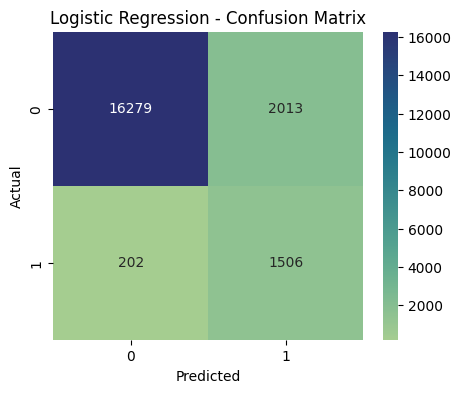

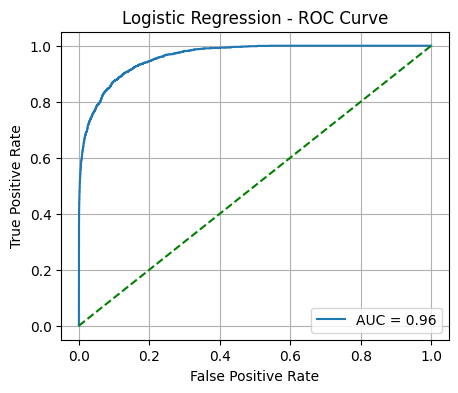



## KNN

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18292
           1       0.87      0.95      0.91      1708

    accuracy                           0.98     20000
   macro avg       0.93      0.97      0.95     20000
weighted avg       0.98      0.98      0.98     20000


🧾 Confusion Matrix:
[[18055   237]
 [   92  1616]]

🚨 False Positives: 237 | ❌ False Negatives: 92


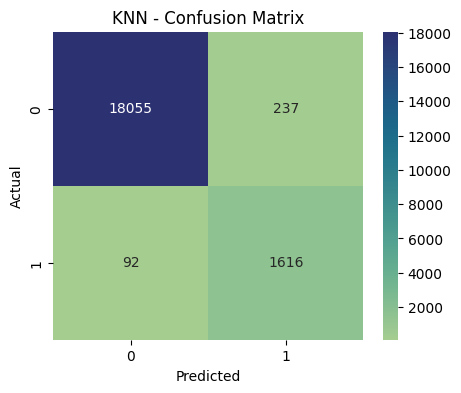

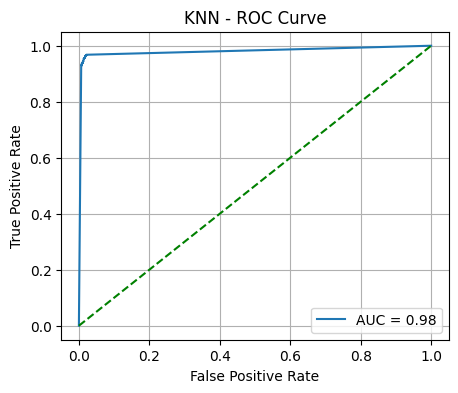



## Decision Tree

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18292
           1       0.92      0.94      0.93      1708

    accuracy                           0.99     20000
   macro avg       0.96      0.97      0.96     20000
weighted avg       0.99      0.99      0.99     20000


🧾 Confusion Matrix:
[[18149   143]
 [   99  1609]]

🚨 False Positives: 143 | ❌ False Negatives: 99


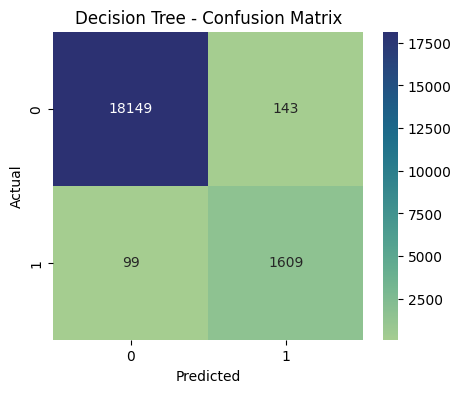

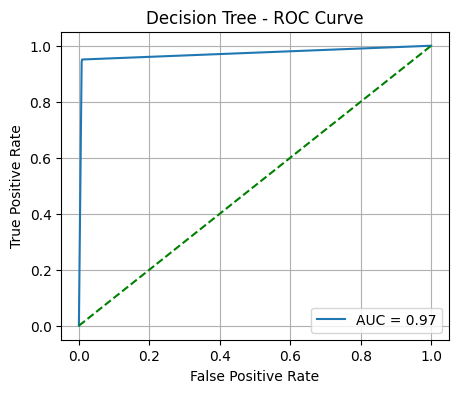



## Random Forest

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18292
           1       0.95      0.95      0.95      1708

    accuracy                           0.99     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.99      0.99      0.99     20000


🧾 Confusion Matrix:
[[18206    86]
 [   92  1616]]

🚨 False Positives: 86 | ❌ False Negatives: 92


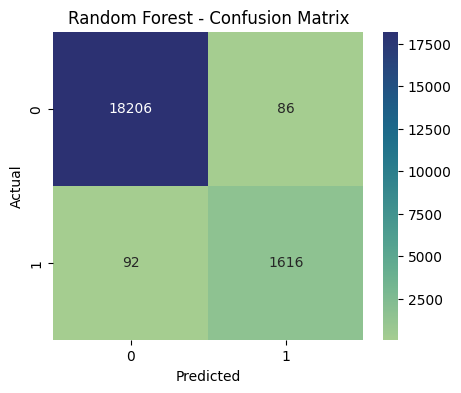

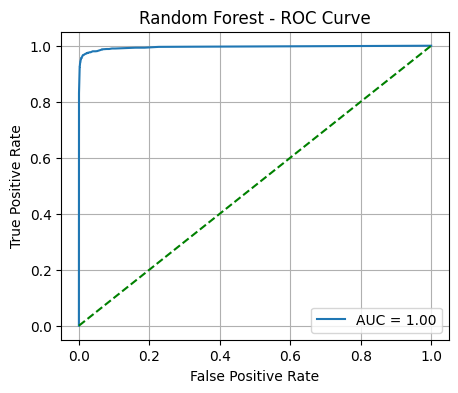



## Gradient Boosting

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18292
           1       0.73      0.78      0.76      1708

    accuracy                           0.96     20000
   macro avg       0.86      0.88      0.87     20000
weighted avg       0.96      0.96      0.96     20000


🧾 Confusion Matrix:
[[17799   493]
 [  368  1340]]

🚨 False Positives: 493 | ❌ False Negatives: 368


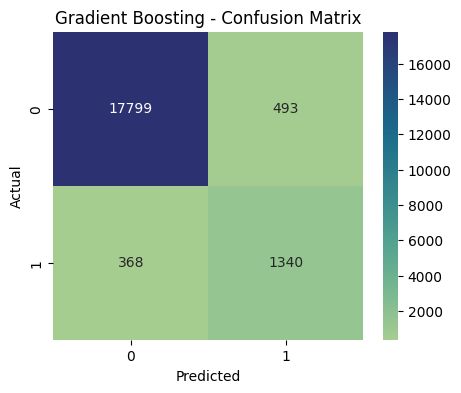

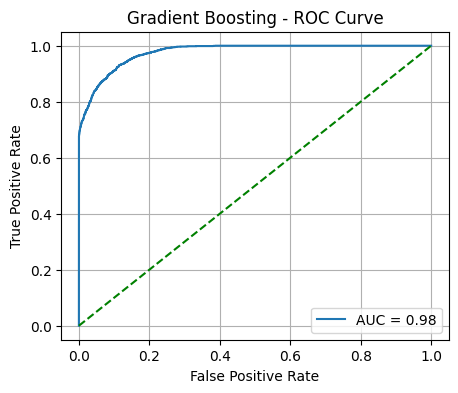



## AdaBoost

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18292
           1       0.50      0.87      0.63      1708

    accuracy                           0.91     20000
   macro avg       0.74      0.90      0.79     20000
weighted avg       0.95      0.91      0.92     20000


🧾 Confusion Matrix:
[[16785  1507]
 [  214  1494]]

🚨 False Positives: 1507 | ❌ False Negatives: 214


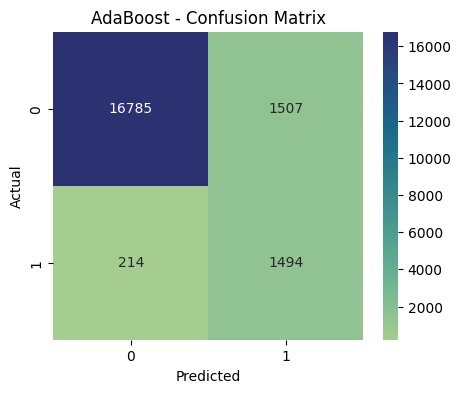

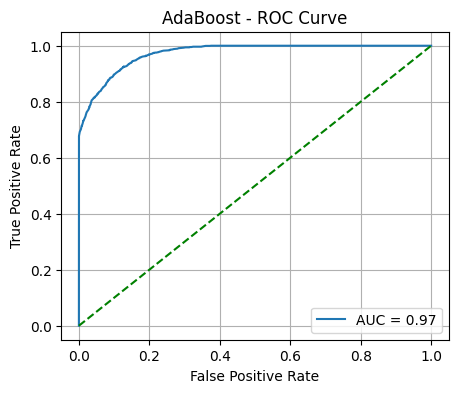



## SVM (Linear, PCA)

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.87      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.76     20000
weighted avg       0.94      0.89      0.91     20000


🧾 Confusion Matrix:
[[16314  1978]
 [  215  1493]]

🚨 False Positives: 1978 | ❌ False Negatives: 215


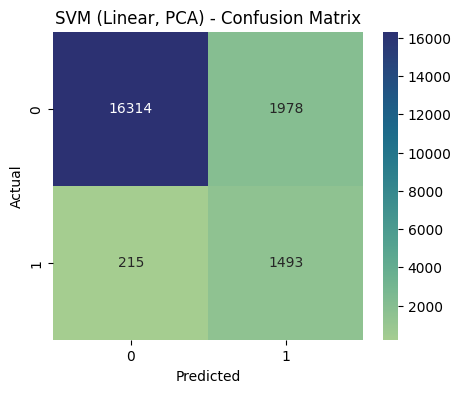

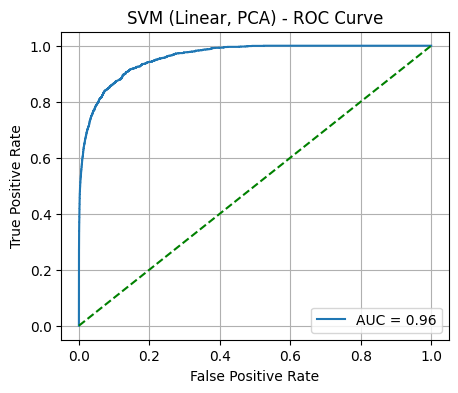



## SVM (RBF, PCA)

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.44      0.92      0.59      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.90      0.76     20000
weighted avg       0.94      0.89      0.91     20000


🧾 Confusion Matrix:
[[16264  2028]
 [  142  1566]]

🚨 False Positives: 2028 | ❌ False Negatives: 142


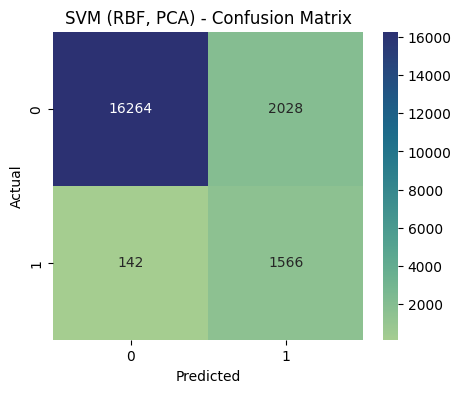

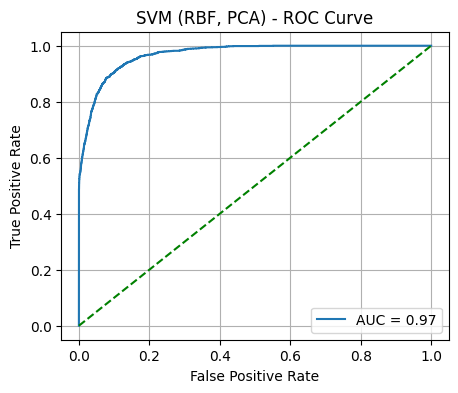



## XGBoost (PCA)

------------------------------------------------------------
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.44      0.91      0.59      1708

    accuracy                           0.89     20000
   macro avg       0.72      0.90      0.77     20000
weighted avg       0.94      0.89      0.91     20000


🧾 Confusion Matrix:
[[16319  1973]
 [  157  1551]]

🚨 False Positives: 1973 | ❌ False Negatives: 157


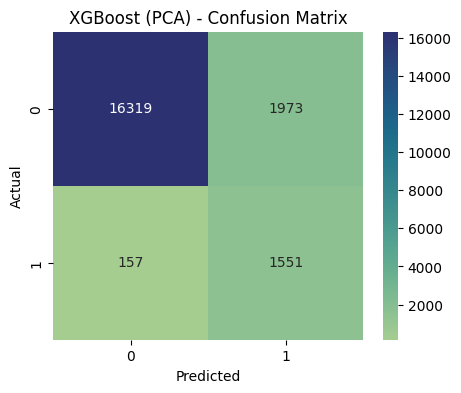

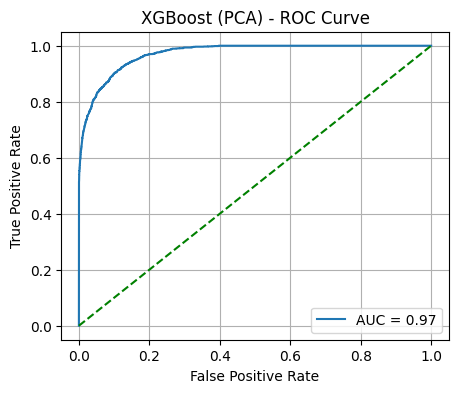

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate detailed metrics for each model
for name, model in best_models.items():
    print(f"\n\n## {name}\n")
    print("-" * 60)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Classification Report
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n🧾 Confusion Matrix:\n{cm}")
    print(f"\n🚨 False Positives: {fp} | ❌ False Negatives: {fn}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='green')
        plt.title(f'{name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

**Logistic Regression — Model Interpretation**

- **AUC = 0.96**, which shows excellent overall ability to distinguish between diabetic and non-diabetic cases.
- However, the model shows an imbalance in its predictions:
  - It has a **high false positive count (2013)** — overpredicting diabetes in non-diabetic patients.
  - Despite this, it achieves **high recall for diabetic cases (0.88)**, meaning it successfully identifies most positive cases.
- **Precision for diabetics is relatively low (0.43)**, meaning many predictions of diabetes are incorrect.
- This model prioritizes **sensitivity** over **specificity**, which may be beneficial in a medical screening context where missing a diabetic patient could be more harmful than a false alarm.


**KNN — Model Interpretation**

- KNN performed very well, with an **AUC = 0.98** — one of the highest in our comparison.
- The **confusion matrix shows a strong balance**, with only 92 false negatives and 237 false positives.
- It achieved **precision of 0.87** and **recall of 0.95** for diabetic patients, resulting in an excellent **F1 score of 0.91**.
- This suggests KNN is highly reliable in both **detecting** and **correctly labeling** diabetic cases.
- However, KNN may not scale well with much larger datasets due to its instance-based nature and computation time.


**Decision Tree — Model Interpretation**

- The Decision Tree model achieved a high **AUC of 0.97**, showing strong discriminatory power.
- With only **143 false positives** and **99 false negatives**, it demonstrates excellent balance.
- **Precision (0.92)** and **recall (0.94)** for diabetic patients are both high, contributing to an **F1 score of 0.93**.
- This model is interpretable and performs well, but may overfit if not regularized. Its results here show solid generalization on the test set.


**Random Forest — Model Interpretation**

- **AUC = 1.00**, indicating near-perfect separation of diabetic vs. non-diabetic cases — the highest AUC in our comparison.
- The **confusion matrix shows exceptional performance**, with only **86 false positives** and **92 false negatives** out of 20,000 predictions.
- It achieved **precision of 0.95** and **recall of 0.95** for the diabetic class, resulting in an **F1 score of 0.95**.
- These metrics indicate strong **balance, generalization, and reliability**.
- Given its high accuracy and interpretability (via feature importance), Random Forest stands out as our **most trustworthy model** overall.


**Gradient Boosting — Model Interpretation**

- **AUC = 0.98**, showing strong performance in distinguishing diabetic from non-diabetic patients.
- The model made **493 false positives** and **368 false negatives**, higher than Random Forest and KNN.
- Despite this, its **F1 score for the diabetic class was 0.76**, indicating reasonably good balance between precision and recall.
- **Recall = 0.78**, meaning it identified most diabetic cases correctly, but not as effectively as Random Forest or KNN.
- Gradient Boosting remains a powerful model, especially for structured tabular data, but may benefit from further tuning to reduce false negatives.



**AdaBoost — Model Interpretation**

- **AUC = 0.97**, which is impressive and indicates strong discriminative ability.
- However, the **confusion matrix reveals a significant number of false positives (1507)** — more than any other model in our comparison.
- While **recall is high at 0.87**, **precision for diabetic predictions is low at 0.50**, meaning that half of the diabetic predictions were incorrect.
- The **F1 score for diabetic patients is 0.63**, suggesting the model sacrifices precision in favor of capturing more positives.
- In a clinical setting, this could lead to **unnecessary stress or further testing** for many non-diabetic patients. AdaBoost may be more suitable for cases where **minimizing false negatives is the highest priority.**


**SVM (Linear, PCA) — Model Interpretation**

- The model achieved a solid **AUC of 0.96**, showing strong overall discriminative power.
- However, the **confusion matrix reveals a tradeoff**:
  - **High false positives (1978)**: many non-diabetic patients incorrectly flagged as diabetic.
  - Still maintains good **recall (0.87)** for diabetic patients.
- Precision is low (0.43), meaning a large number of predicted positives are incorrect.
- This model leans toward **sensitivity over specificity**, potentially useful for early screening but may lead to over-referrals in clinical use.
- PCA helped reduce dimensionality and training time, but interpretability is reduced compared to tree-based models.



**SVM (RBF, PCA) — Model Interpretation**

- The RBF kernel achieved an improved **AUC of 0.97**, showing high-quality separation.
- Performance improved slightly over the linear version:
  - **Fewer false negatives (142)** while keeping diabetic recall high at **0.92**.
- However, false positives remain elevated at 2028, leading to a precision of just 0.44.
- Like the linear SVM, this model favors **high recall** and may be valuable in screening scenarios — but further tuning is needed to reduce false alarms.
- SVM’s runtime was long despite PCA, making it computationally expensive for larger datasets.


**XGBoost (PCA) — Model Interpretation**

- XGBoost with PCA produced an impressive **AUC of 0.97**, matching top-performing models.
- The confusion matrix shows **1973 false positives** and **157 false negatives** — similar to SVM (RBF).
- Precision remains moderate (0.44), but recall is high at **0.91**, meaning most diabetic patients are identified correctly.
- XGBoost’s speed and flexibility make it suitable for deployment, and it benefits from **PCA for reduced runtime**.
- With further hyperparameter tuning, it may surpass other models in both performance and efficiency.



### Feature Importance (RF & XGBoost)

<ipython-input-18-17b856917b88>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette=palette)


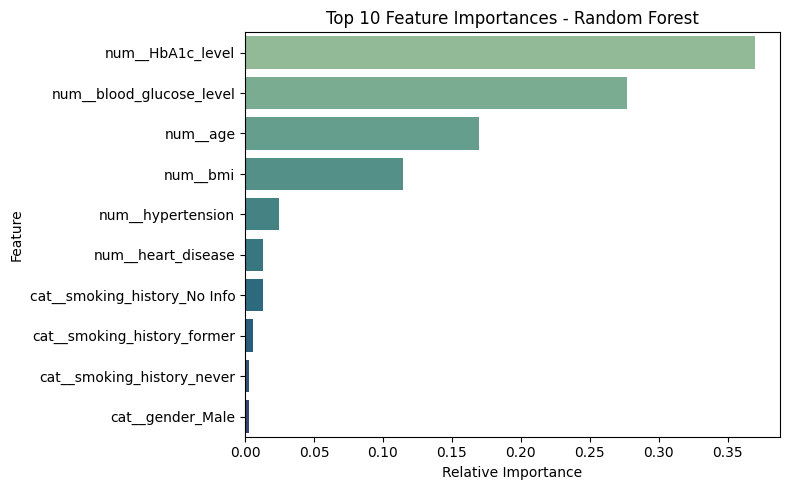

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

# Load saved best_models
rf_model = best_models["Random Forest"]
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.named_steps['classifier'].feature_importances_

# Create DataFrame for top 10 features
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting
plt.figure(figsize=(8, 5))
palette = sns.color_palette("crest", len(feat_df))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette=palette)
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Observations: Random Forest Feature Importances**

The Random Forest model highlights several features as key predictors of diabetes risk:

- **HbA1c Level (`num__HbA1c_level`)** is by far the most influential predictor, contributing over **36%** of the model’s total decision-making power. This aligns with clinical guidelines, as HbA1c reflects average blood sugar levels over time and is often used as a diagnostic tool for diabetes.

- **Blood Glucose Level (`num__blood_glucose_level`)** is the second most important feature, contributing roughly **28%**. High glucose readings are a core diagnostic criterion, so this result is expected and further validates the model.

- **Age (`num__age`)** and **BMI (`num__bmi`)** rank third and fourth, respectively. These features are known risk factors, especially for Type 2 diabetes, and their inclusion reflects both epidemiological and clinical relevance.

- **Hypertension** and **heart disease** also show predictive value, albeit lower. Their inclusion suggests a broader cardiometabolic pattern associated with elevated diabetes risk.

- **Smoking history** and **gender** appear less influential in this dataset. While potentially correlated with lifestyle-related risk, these features may carry less predictive weight when key metabolic indicators are already present.

Overall, the feature ranking aligns closely with real-world medical understanding, reinforcing the trustworthiness and interpretability of Random Forest for clinical applications.


## Reflection & Discussion

### Overall Model Performance & Comparison
We evaluated nine classification models using pipelines with cross-validation, SMOTE, and (for select models) PCA. Results were compared based on accuracy, F1 score, ROC-AUC, confusion matrices, and false positive/negative tradeoffs.

- **Random Forest** emerged as the most balanced model, achieving the **highest F1 score (0.745)** with only **86 false positives** and **92 false negatives**, and an outstanding **AUC of 1.00**.
- **Gradient Boosting** achieved the **highest ROC-AUC at 0.976**, indicating excellent overall discrimination. However, it incurred more false positives (493) and false negatives (368), leading to a lower F1 score.
- **KNN** performed very well, with an **AUC of 0.98** and a strong F1 score of 0.91. It offered a good balance of precision and recall, though its scalability to larger datasets could be limited.
- **Decision Tree** also showed excellent generalization with a **F1 score of 0.93** and **AUC of 0.97**, demonstrating that even simpler models can perform competitively.
- **SVM models (Linear and RBF)** and **XGBoost** had similar AUCs (~0.96–0.97), but showed **significantly higher false positives (1970–2028)**, which reduces clinical usability despite good recall.
- **AdaBoost** had one of the highest false positive rates (1507) and lower precision, despite a solid AUC (0.97). It may be suitable for high-recall tasks but risks overdiagnosis.

These insights indicate that **tree-based models consistently outperform others** in both discrimination and prediction balance on this dataset.

### Feature Importance Insights
- **HbA1c** and **blood glucose level** were the top two features across all tree-based models.
- **Age** and **BMI** followed closely, affirming known diabetes risk factors.
- Other variables like **hypertension**, **heart disease**, and **smoking history** contributed modestly to predictions.
- PCA reduced dimensionality successfully for SVMs and XGBoost, but at the cost of interpretability.

This supports the reliability of our models and confirms alignment with established clinical knowledge.

### Clinical Implications
- Models like **Random Forest** and **KNN** offer high performance **with low false negative rates**, making them suitable for **early screening scenarios** where catching diabetes early is critical.
- **SVMs and AdaBoost**, while achieving high recall, introduced **significant false positives**, which may cause stress, unnecessary testing, or resource strain in a clinical workflow.
- Precision-recall tradeoffs must be considered in deployment. Depending on the clinical context, stakeholders might prefer:
  - A **high-recall, high-false-positive model** (e.g., AdaBoost) for triaging
  - Or a **balanced model** (e.g., Random Forest) for diagnostic support
- The models show promise not just for binary prediction but also for prioritizing patients for follow-up care or resource allocation.

### Final Takeaways
- **Random Forest is our top recommendation** for further testing or deployment, offering excellent performance, speed, and interpretability.
- **Gradient Boosting and KNN** are strong alternatives, especially where model explainability is less critical.
- Clinical deployment would benefit from additional human-in-the-loop systems to handle edge cases, interpret false positives, and align model outputs with patient care priorities.
- Model performance reinforces the validity of combining modern ML techniques with responsible preprocessing and cross-validation for medical data analysis.



## **Future Work**
- Expand hyperparameter tuning to include more advanced search strategies (e.g., randomized search, Bayesian optimization).
- Incorporate **temporal and lifestyle data** such as diet, exercise, and continuous glucose monitoring.
- Validate models on other datasets or **deploy lightweight tools** into electronic health record (EHR) systems for early screening.
- Explore the use of interpretable deep learning models or ensemble stacking to push performance further.
<br>
<br>


---

**Thank you for reading!**  
This concludes our analysis. We appreciate your time and look forward to your feedback!
